A data file is provided with daily temperature data from Sodankylä from <b>January 1908 to October 2020</b>. The data was downloaded from the NOAA Global Historical Climate Network database as a text file. 


STATION           | STATION_NAME     | DATE     | TAVG  | TMAX  | TMIN | 
------------------|------------------|----------|-------|-------|------|
GHCND:FI000007501 | SODANKYLA-AWS-FI | 19080101 | -9999 | 2     | -37  |
GHCND:FI000007501 | SODANKYLA-AWS-FI | 19080102 | -9999 | 6     | -26  |
GHCND:FI000007501 | SODANKYLA-AWS-FI | 19080103 | -9999 | 7     | -27  |
 ....             |  .....           | ...      |  ...  | ..    | ..   |

* `DATE`: Date in 'YEARMODA' format.
* `TAVG`: The average daily temperature in Fahrenheit.
* `TMAX`: The maximum daily temperature in Fahrenheit.
* `TMIN`: The minimum daily temperature in Fahrenheit
 it

Missing data are identified with **-9999**

## Important note about the da
tTt there are many missing values in the TAVG column. For days where the TAVG values are missi an calculate an estimate of the average da ly temperature by averaging the TMAX and TMIN values. You  to do this in a new column. Note don't replace the existing TAVG values with your estimates!

In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True
import matplotlib.pyplot as plt

# What to do.


#### 1. Read in the provided data file using pandas and convert missing data to NA value.

In [2]:
# Assign the file path to a varible fp
fp = r"data/2315676.txt"

# Read the data file as pandas DataFrame

data =pd.read_csv(
    fp,
    usecols= ["DATE", "TAVG", "TMAX", "TMIN"],
    skiprows=[1],
    na_values=-9999,
    sep='\s+',
    parse_dates = ["DATE"],   
)

In [3]:
data

,DATE,TAVG,TMAX,TMIN
0,1908-01-01,NaN,2.0,-37.0
1,1908-01-02,NaN,6.0,-26.0
2,1908-01-03,NaN,7.0,-27.0
3,1908-01-04,NaN,-3.0,-27.0
4,1908-01-05,NaN,4.0,-36.0
...,...,...,...,...
41060,2020-10-03,47.0,51.0,NaN
41061,2020-10-04,43.0,47.0,37.0
41062,2020-10-05,42.0,NaN,37.0
41063,2020-10-06,45.0,46.0,43.0


#### 2. Fill in the missing values in the `TAVG` column with your estimates of the average daily temperature as noted above in the data section. You can then drop any average daily temperatures that are still missing.



In [4]:
# Creating a new column to store values where the TAVG is missing using TMAX and TMIN

data["TEMP_F"] = 0.0

In [5]:
""" To find and replace the rows where TAVG is NaN 
    and Both TMAX and TMIN are not NaN with the average of TMAX and TMIN """

data.loc[(data["TAVG"].isna()) & (data["TMAX"].notna()) & (data["TMAX"].notna()), "TEMP_F"] = (data["TMAX"] + data["TMIN"]) / 2

# And for rows where TAVG is not NaN, add the TAVG to the TEMP column

data.loc[data["TAVG"].notna(), "TEMP_F"] = data["TAVG"]

In [6]:
# Test if there are still NaN values in the TEMP column
data["TEMP_F"].hasnans


True

In [7]:
# and The number of NaN values
NaN_values = data["TEMP_F"].isna().sum()
print(NaN_values)

90


In [8]:
# Using the dropna() function and the subset parameter to to process the NaN values by the TEMP_F column 
data = data.dropna(subset=["TEMP_F"])

In [9]:
#chec again if there are any NaN left
data["TEMP_F"].hasnans

False

#### 3. Define and use a function to convert temperatures in Fahrenheit to Celsius.

In [10]:
def far_to_cel(tempF):
    """Function to convert Fahrenheit to Celsius.

    Parameters
    ----------

    tempF: int | float
        Input temperature in Fahrenheit (should be a number)

    Returns
    -------

    Temperature in Celsius (float)
    """

    # Convert the Fahrenheit into Celsius
    tempC = (tempF - 32) / 1.8

    return tempC

In [11]:
# Creating a new Column TEMP_C to store the temperature in Celsius degree
data["TEMP_C"] = 0.0

# Assigning the converted value to the column 
#by calculating it from the TEMP_F column using the created function
data["TEMP_C"] = data["TEMP_F"].apply(far_to_cel)

#### 4. Calculate seasonal average temperatures for each season in every year (e.g., Winter 1909, Spring 1909, Summer 1909, ...)
   
    - The seasons should include the following months:

          Winter: December, January, February
          Spring: March, April, May
          Summer: June. July, August
          Autumn: September, October, November, 
          

In [12]:
"""
We will create a new column MONTHS that we will store the months 
by grabbing it from the DATE column,
later we will use this column to group the data by the Season and calculate it is mean
"""
# Parse the Month temporal components from DATE to column MONTH
data["MONTH"] = data["DATE"].dt.month
# and for Year 
data["YEAR"] = data["DATE"].dt.year
data["SEASON"] = pd.Series(dtype="string")

In [13]:
# Classifying the data according to te month it was quired to Winter, Spring, Summer and Autumn

# Monthes 12, 1, and 2 is Winter
data.loc[(data["MONTH"] == 12) | (data["MONTH"] < 3), "SEASON"] = "Winter"

# Monthes 3 to 5 is Spring
data.loc[(data["MONTH"] >= 3) & (data["MONTH"] < 6), "SEASON"] = "Spring"

# Monthes 6 to 8 is Summer
data.loc[(data["MONTH"] >= 6) & (data["MONTH"] < 9), "SEASON"] = "Summer"

# Monthes 9 to 11 is Autumn
data.loc[(data["MONTH"] >= 9) & (data["MONTH"] < 12), "SEASON"] = "Autumn"

In [14]:
# making sure different 4 values are stores
data["SEASON"].unique()

<StringArray>
['Winter', 'Spring', 'Summer', 'Autumn']
Length: 4, dtype: string

In [15]:
YearlySeason = data.groupby(["YEAR", "SEASON"])["TEMP_C"].mean().reset_index().rename(columns={"TEMP_C" : "TEMP_YearlyS"})

In [16]:
YearlySeason

,YEAR,SEASON,TEMP_YearlyS
0,1908,Autumn,-1.859217
1,1908,Spring,-2.693508
2,1908,Summer,11.105006
3,1908,Winter,-12.330779
4,1909,Autumn,-1.541823
...,...,...,...
447,2019,Winter,-11.395062
448,2020,Autumn,7.717718
449,2020,Spring,-0.827295
450,2020,Summer,14.438339


In [17]:
""" Running the followung code will print all the temperature values
be cautious 
for temp, season, year in zip(groupSeason["TEMP_C"], groupSeason["YEAR"], groupSeason["SEASON"]):
    print(f"The average temperature for the {season}  of {year} is {temp:.2f}°C")
    """ 

' Running the followung code will print all the temperature values\nbe cautious \nfor temp, season, year in zip(groupSeason["TEMP_C"], groupSeason["YEAR"], groupSeason["SEASON"]):\n    print(f"The average temperature for the {season}  of {year} is {temp:.2f}°C")\n    '

#### 5. Calculate seasonal average temperatures for the reference period 1951-1980 (e.g., 4 values in total, one for each season).

In [18]:
""" Grouping every data to the season it was recorded on """
# Selecting the data for the period between 1951 and 198
selected = data.loc[(data["YEAR"] >= 1951) & (data["YEAR"] <= 1980)]

grouped51_80 = selected.groupby("SEASON")["TEMP_C"].mean().reset_index().rename(columns={"TEMP_C": "TEMP_AvSe"})
grouped51_80

,SEASON,TEMP_AvSe
0,Autumn,-0.814910
1,Spring,-2.338307
2,Summer,12.400262
3,Winter,-13.552540


In [19]:
for season, temp in zip(grouped51_80["SEASON"], grouped51_80["TEMP_AvSe"]):
    print(f" The average seasonal temerature for {season} was {temp:.2f} °C")

 The average seasonal temerature for Autumn was -0.81 °C
 The average seasonal temerature for Spring was -2.34 °C
 The average seasonal temerature for Summer was 12.40 °C
 The average seasonal temerature for Winter was -13.55 °C


In [20]:
""" Calculating the mean temperature for the 4 seasons of the whole period """
# For winter
Winter_average = data["TEMP_C"].loc[data["SEASON"] == "Winter"].mean()
print(f"The mean temperature for winter season for the recorded period is {Winter_average.round(2)} °C.")

# For Spring
Spring_average = data["TEMP_C"].loc[data["SEASON"] == "Spring"].mean()
print(f"The mean temperature for Spring season for the recorded period is {Spring_average.round(2)} °C.")

# For Summer
Summer_average = data["TEMP_C"].loc[data["SEASON"] == "Summer"].mean()
print(f"The mean temperature for Summer season for the recorded period is {Summer_average.round(2)} °C.")

# For Autumn
Autumn_average = data["TEMP_C"].loc[data["SEASON"] == "Autumn"].mean()
print(f"The mean temperature for Autumn season for the recorded period is {Autumn_average.round(2)} °C.")


The mean temperature for winter season for the recorded period is -12.89 °C.
The mean temperature for Spring season for the recorded period is -2.03 °C.
The mean temperature for Summer season for the recorded period is 12.44 °C.
The mean temperature for Autumn season for the recorded period is -0.49 °C.


#### 6. Calculate seasonal temperature anomalies for each year.

In [21]:
"""
The Seasonal temperature anomaly is calculated as the difference between the temperature for a 
given season of a certain yearn(TEMP_C in YearlySeason) and the corresponding Seosnal 
reference temperature (TEMP_AvSe column grouped51_80)
"""

#Choosing the same years
YearlySeason =  YearlySeason.loc[(YearlySeason["YEAR"] >= 1951) & (YearlySeason["YEAR"] <= 1980)]

# Make a table join between YearlySeason and grouped51_80 to calcualte the anomalis 
SeaonalAnom = YearlySeason.merge(grouped51_80, on="SEASON")

# Finding the anamolies by calculating the difference between YearlySeason from grouped51_80 in anew column ANOMALY
SeaonalAnom["ANOMALY"] = SeaonalAnom["TEMP_YearlyS"] - SeaonalAnom["TEMP_AvSe"]

#### 7. Plot the data as shown in the example
 
   ![](https://raw.githubusercontent.com/Geo-Python-2024/Final-exercise/main/img/axes.png)

In [22]:
"""
Dividing the SeaonalAnom data to four parts [Winter, Spring, Summer, Autumn] for ploting
"""
Winter = SeaonalAnom[SeaonalAnom["SEASON"] == "Winter"]

Spring = SeaonalAnom[SeaonalAnom["SEASON"] == "Spring"]

Summer= SeaonalAnom[SeaonalAnom["SEASON"] == "Summer"]

Autumn = SeaonalAnom[SeaonalAnom["SEASON"] == "Autumn"]

In [23]:
# Testing the result
Winter.head()

,YEAR,SEASON,TEMP_YearlyS,TEMP_AvSe,ANOMALY
3,1951,Winter,-13.904321,-13.55254,-0.351781
7,1952,Winter,-10.262515,-13.55254,3.290025
11,1953,Winter,-11.003086,-13.55254,2.549453
15,1954,Winter,-10.216049,-13.55254,3.336490
19,1955,Winter,-18.135802,-13.55254,-4.583263


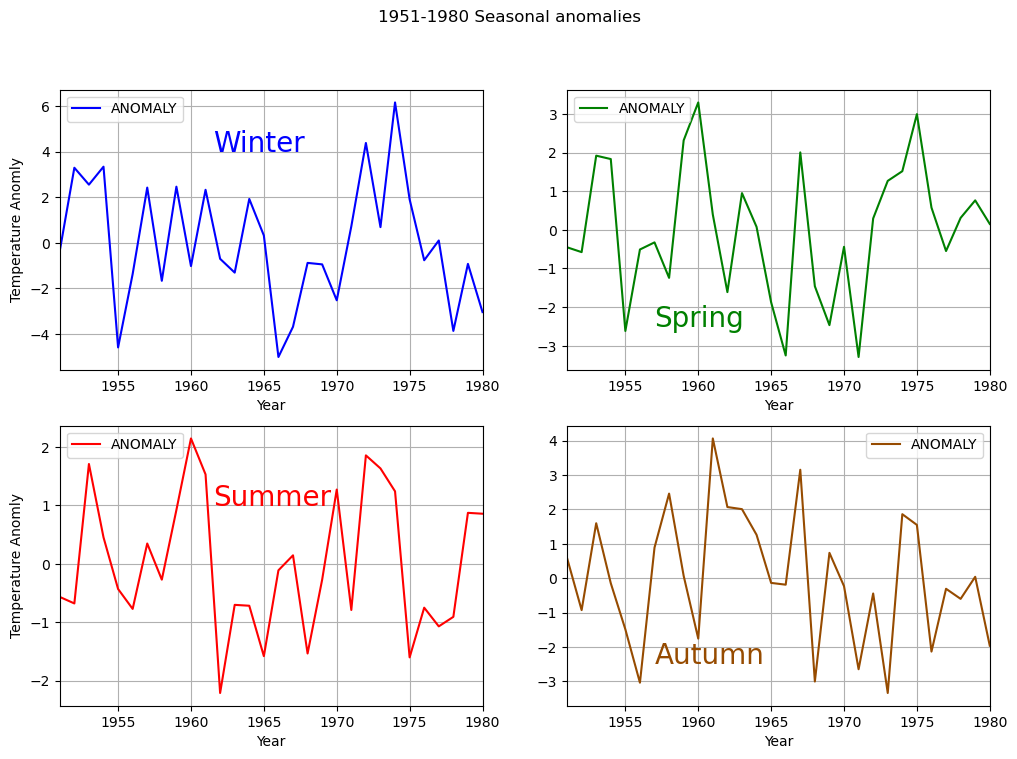

In [26]:
# Create the figure and subplot axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Define variables to easily refer to axes
ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

# Set plot line width
line_width = 1.5

# Plot data

Winter.plot(
    y= "ANOMALY",
    x= "YEAR",
    ax=ax11,
    c="blue",
    xlim=[1951, 1980],
    ylabel = "Temperature Anomly",
    xlabel= "Year",
    grid= True,
    lw=line_width
)


Spring.plot(
    y= "ANOMALY",
    x= "YEAR",
    ax=ax12,
    c="g",
     grid= True,
    xlabel= "Year",
    xlim=[1951, 1980],
    lw=line_width
)

Summer.plot(
    ax=ax21,
    y= "ANOMALY",
    x= "YEAR",
    ylabel = "Temperature Anomly",
    xlabel= "Year",
    c="r",
    grid= True,
    xlim=[1951, 1980],
    lw=line_width
)

Autumn.plot(
    ax=ax22,
    y= "ANOMALY",
    x= "YEAR",
    xlabel= "Year",
    c="#964B00",
    grid= True,
    xlim=[1951, 1980],
    lw=line_width
)

# Subplot Title 
fig.suptitle("1951-1980 Seasonal anomalies")

#Adding text to plots
ax11.text(1961.5, 4, "Winter", c="b", fontsize= 20)
ax12.text(1957, -2.5, "Spring", c="g", fontsize= 20)
ax21.text(1961.5, 1, "Summer", c="r", fontsize= 20)
ax22.text(1957, -2.5, "Autumn", c="#964B00", fontsize= 20)

plt.show()